In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization, Conv2D, UpSampling2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
from tensorflow.keras import backend
backend.set_image_data_format('channels_first')

In [3]:
def get_unet():
    #concat_axis = 3 # 3 o 1
    concat_axis = 1 
    #inputs = layers.Input(shape = (80, 120, 3))
    inputs = layers.Input(shape = (3, 128, 144))
    
    #encoder
    bn0 = BatchNormalization(axis=1)(inputs)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1_1')(bn0)
    bn1 = BatchNormalization(axis=1)(conv1)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(bn1)
    bn2 = BatchNormalization(axis=1)(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(bn2)
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    bn3 = BatchNormalization(axis=1)(conv2)
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(bn3)
    bn4 = BatchNormalization(axis=1)(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(bn4)

    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    bn5 = BatchNormalization(axis=1)(conv3)
    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(bn5)
    bn6 = BatchNormalization(axis=1)(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(bn6)

    conv4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    bn7 = BatchNormalization(axis=1)(conv4)
    conv4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(bn7)
    bn8 = BatchNormalization(axis=1)(conv4)
    #pool4 = layers.MaxPooling2D(pool_size=(2, 3))(bn8)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(bn8)
    
    conv5 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    bn9 = BatchNormalization(axis=1)(conv5)
    conv5 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(bn9)
    bn10 = BatchNormalization(axis=1)(conv5)

    ##decoder
    #up_conv5 = layers.UpSampling2D(size=(2, 3))(bn10)
    up_conv5 = layers.UpSampling2D(size=(2, 2))(bn10)
    up6 = layers.concatenate([up_conv5, conv4], axis=concat_axis)
    conv6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    bn11 = BatchNormalization(axis=1)(conv6)
    conv6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(bn11)
    bn12 = BatchNormalization(axis=1)(conv6)

    up_conv6 = layers.UpSampling2D(size=(2, 2))(bn12)
    up7 = layers.concatenate([up_conv6, conv3], axis=concat_axis)
    conv7 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    bn13 = BatchNormalization(axis=1)(conv7)
    conv7 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(bn13)
    bn14 = BatchNormalization(axis=1)(conv7)

    up_conv7 = layers.UpSampling2D(size=(2, 2))(bn14)
    up8 = layers.concatenate([up_conv7, conv2], axis=concat_axis)
    conv8 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    bn15 = BatchNormalization(axis=1)(conv8)
    conv8 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(bn15)
    bn16 = BatchNormalization(axis=1)(conv8)

    up_conv8 = layers.UpSampling2D(size=(2, 2))(bn16)
    up9 = layers.concatenate([up_conv8, conv1], axis=concat_axis)
    conv9 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    bn17 = BatchNormalization(axis=1)(conv9)
    conv9 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(bn17)
    bn18 = BatchNormalization(axis=1)(conv9)

    conv10 = layers.Conv2D(1, (1, 1))(bn18)
    #bn19 = BatchNormalization(axis=1)(conv10)

    model = models.Model(inputs=inputs, outputs=conv10)

    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='mae', optimizer=sgd, metrics=['mse','acc'])
    #model.compile(loss='mae', optimizer=Adam(lr=0.01), metrics=['mse'])
    print(model.summary())

    return model

In [4]:
model = get_unet()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3, 128, 144) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 3, 128, 144)  12          input_1[0][0]                    
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, 32, 128, 144) 896         batch_normalization[0][0]        
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 128, 144) 128         conv1_1[0][0]                    
______________________________________________________________________________________________

In [5]:
## X:
X_train = np.load("/opt/datos/dataset/gfs/X_train_3-7-9.npy")
X_val   = np.load("/opt/datos/dataset/gfs/X_val_3-7-9.npy")
print(X_train.shape)
print(X_val.shape)

## Y:
Y_train = np.load("/opt/datos/dataset/gfs/Y_train.npy")
Y_val   = np.load("/opt/datos/dataset/gfs/Y_val.npy")
print(Y_train.shape)
print(Y_val.shape)

(13502, 3, 137, 157)
(2893, 3, 137, 157)
(13502, 137, 157)
(2893, 137, 157)


In [6]:
# Recorte para obtener 128x144
X_train = X_train[:, :, 0:128, 0:144]
X_val = X_val[:, :, 0:128, 0:144]
print(X_train.shape)
print(X_val.shape)

Y_train = Y_train[:, 0:128, 0:144]
Y_val = Y_val[:, 0:128, 0:144]
print(Y_train.shape)
print(Y_val.shape)

(13502, 3, 128, 144)
(2893, 3, 128, 144)
(13502, 128, 144)
(2893, 128, 144)


In [7]:
Y_train = np.expand_dims(Y_train, axis=1)
Y_val = np.expand_dims(Y_val, axis=1)

print(Y_train.shape)
print(Y_val.shape)

(13502, 1, 128, 144)
(2893, 1, 128, 144)


In [8]:
Y_train_flip = np.zeros((Y_train.shape[0], Y_train.shape[1], Y_train.shape[2]))
for k,yt in enumerate(Y_train):
    Y_train_flip[k,:,:] = np.flipud(yt)

Y_val_flip = np.zeros((Y_val.shape[0], Y_val.shape[1], Y_val.shape[2]))
for j,yv in enumerate(Y_val):
    Y_val_flip[j,:,:] = np.flipud(yv)

In [9]:
Y_train_flip = np.expand_dims(Y_train_flip, axis=1)
Y_val_flip = np.expand_dims(Y_val_flip, axis=1)

print(Y_train_flip.shape)
print(Y_val_flip.shape)

(8350, 1, 176, 176)
(1789, 1, 176, 176)


In [8]:
history = model.fit(X_train, Y_train, epochs=20, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/20
422/422 [==============================] - 302s 575ms/step - loss: 0.5439 - mse: 3.7916 - acc: 0.0240 - val_loss: 0.3676 - val_mse: 2.2946 - val_acc: 0.0221
Epoch 2/20
422/422 [==============================] - 167s 395ms/step - loss: 0.4354 - mse: 3.4106 - acc: 0.0403 - val_loss: 0.3555 - val_mse: 2.0014 - val_acc: 0.0389
Epoch 3/20
422/422 [==============================] - 167s 395ms/step - loss: 0.4139 - mse: 3.0977 - acc: 0.0489 - val_loss: 0.3421 - val_mse: 1.9555 - val_acc: 0.0463
Epoch 4/20
422/422 [==============================] - 167s 395ms/step - loss: 0.4078 - mse: 3.0051 - acc: 0.0546 - val_loss: 0.3371 - val_mse: 1.7507 - val_acc: 0.0427
Epoch 5/20
422/422 [==============================] - 166s 395ms/step - loss: 0.3940 - mse: 2.8342 - acc: 0.0596 - val_loss: 0.3399 - val_mse: 1.7102 - val_acc: 0.0553
Epoch 6/20
422/422 [==============================] - 167s 395ms/step - loss: 0.3852 - mse: 2.6832 - acc: 0.0635 - val_loss: 0.3271 - val_mse: 1.5944 - val_acc:

In [9]:
with open('/opt/datos/entrenamientos/gfs/01', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [10]:
history = pickle.load( open( "/opt/datos/entrenamientos/gfs/01", "rb" ) )

In [11]:
import matplotlib.pyplot as plt

~ Unet Dataset 2017-2021 ~
val_loss: 0.31826767325401306
loss: 0.3245305120944977


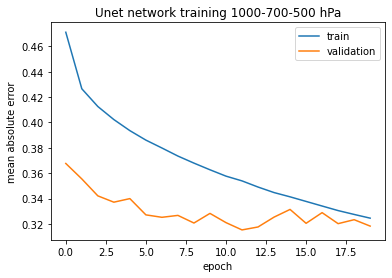

In [12]:
print("~ Unet Dataset 2017-2021 ~")
print(f"val_loss: {history['val_loss'][-1]}")
print(f"loss: {history['loss'][-1]}")
#print(history)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Unet network training 1000-700-500 hPa')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [13]:
model.save('/opt/datos/entrenamientos/gfs/01.h5')